### 机器学习
- 特征提取
- 选择核函数来计算相似性
- 凸优化问题
- 漂亮的定理
- 特征工程师关键，最后用SVM

### AlexNet
- 更深更大的LeNet
- 主要改进：
  - 丢弃法
  - ReLU
  - MaxPooling
- 计算机视觉方法论的改变
  - **通过CNN学习特征**
  - （SVM需要人工特征提取）
- 卷积和矩阵乘法，都是可以在硬件上*并行化*的操作
  
### AlexNet架构（与LeNet对比）
- 第一层卷积
  - 更大的核窗口（$11\times11$）和步长（`stride=4`），因为图片更大（通道数=96）
  - 更大的池化窗口（$3\times3$），使用最大池化层（`stride=2`）
- 新增了3层卷积层
  -更多的通道数
- 同样用两个隐藏层（使用全连接层），最后softmax输出
-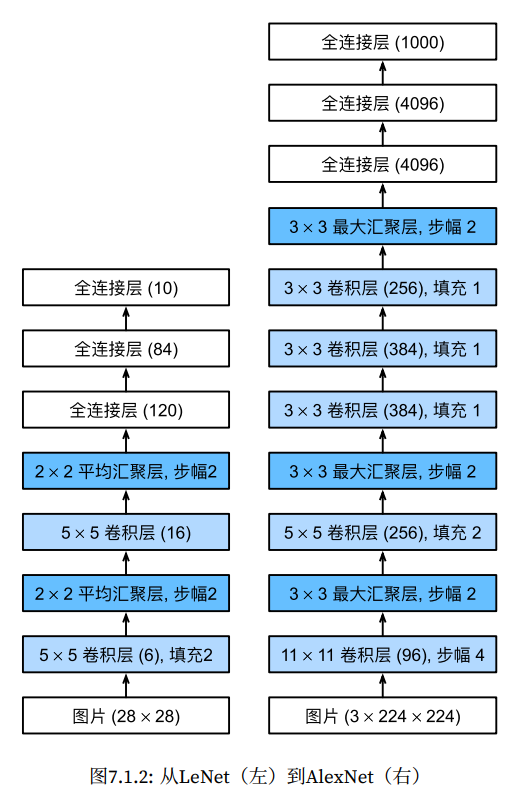

### 更多细节
- 激活函数从Sigmoid变成了ReLU（减缓梯度消失）
- 隐藏全连接层后加入了丢弃层
- 数据增强

### 代码

In [ ]:
!pip install d2l

- 使用的是`Fashion-MNIST`，所以输入通道是1，输出通道是10

In [ ]:
import torch

from torch import nn
from d2l import torch as d2l

net = nn.Sequential(
    nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # 减小卷积窗口，使用填充为2来使得输入与输出的高和宽一致，且增大输出通道数
    nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # 使用3个连续的卷积层和较小的卷积窗口
    nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),
    nn.Linear(6400, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 10)
)

**构造一个高宽都是224的单通道数据，来观察每一层的输出情况**

In [ ]:
X = torch.rand((1, 1, 224, 224))
for layer in net:
  print(layer.__class__.__name__, 'output shape \t',X.shape)

Conv2d output shape 	 torch.Size([1, 1, 224, 224])
ReLU output shape 	 torch.Size([1, 1, 224, 224])
MaxPool2d output shape 	 torch.Size([1, 1, 224, 224])
Conv2d output shape 	 torch.Size([1, 1, 224, 224])
ReLU output shape 	 torch.Size([1, 1, 224, 224])
MaxPool2d output shape 	 torch.Size([1, 1, 224, 224])
Conv2d output shape 	 torch.Size([1, 1, 224, 224])
ReLU output shape 	 torch.Size([1, 1, 224, 224])
Conv2d output shape 	 torch.Size([1, 1, 224, 224])
ReLU output shape 	 torch.Size([1, 1, 224, 224])
Conv2d output shape 	 torch.Size([1, 1, 224, 224])
ReLU output shape 	 torch.Size([1, 1, 224, 224])
MaxPool2d output shape 	 torch.Size([1, 1, 224, 224])
Flatten output shape 	 torch.Size([1, 1, 224, 224])
Linear output shape 	 torch.Size([1, 1, 224, 224])
ReLU output shape 	 torch.Size([1, 1, 224, 224])
Dropout output shape 	 torch.Size([1, 1, 224, 224])
Linear output shape 	 torch.Size([1, 1, 224, 224])
ReLU output shape 	 torch.Size([1, 1, 224, 224])
Dropout output shape 	 torch.Size(

- 注意

```
tranform = transforms.Compose([
  transforms.Resize(resize),
  transforms.ToTensor()
])
```




In [ ]:
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader

def load_data_fashion_mnist(batch_size, resize=None):
    transform_list = []
    if resize:
        transform_list.append(transforms.Resize(resize))
    transform_list.append(transforms.ToTensor())

    transform = transforms.Compose(transform_list)

    train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
    test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, test_loader

batch_size = 128
train_iter, test_iter = load_data_fashion_mnist(batch_size, resize=224)

100%|██████████| 26.4M/26.4M [00:00<00:00, 114MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 10.2MB/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw




100%|██████████| 4.42M/4.42M [00:00<00:00, 64.7MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 22.9MB/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



- AlexNet计算量比LeNet计算量多200倍大概，但是训练速度只慢了20倍（GPU使用率变高）

loss 0.196, train acc 0.928, test acc 0.910
1625.6 examples/sec on cuda:0


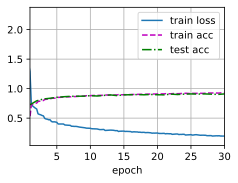

In [ ]:
lr, num_epochs = 0.01, 30
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

### 小结
- AlexNet的构架与LeNet相似，但使用了更多的卷积层和更多的参数来拟合大规模的ImageNet数据集
- AlexNet是从浅层网络到深层网络的关键一步
- **Dropout、ReLU和预处理**是提升计算机视觉任务性能的其他关键步骤

### 注意：
- AlexNet最后两个相同的全连接层（4096）不能只有一个，效果会变差，前面的卷积不够深


### 练习
1. 试着增加迭代轮数，对比LeNet的结果有什么不同？为什么？

| model   | epochs | train_acc | test_acc |
|---------|--------|-----------|----------|
| AlexNet | 10     | 0.879     | 0.875    |
| AlexNet | 20     | 0.907     | 0.900    |
| AlexNet | 30     | 0.924     | 0.912    |
| LeNet   | 10     | 0.857     | 0.856    |
| LeNet   | 20     | 0.889     | 0.876    |
| LeNet   | 30     | 0.905     | 0.890    |


- AlexNet整体上有更高的训练和测试准确率，并且随着epoch的增加，提高速度更快
- AlexNet的训练准确率和测试准确率的差距较小，有更好的泛化能力，较少过拟合
- AlexNet在30epoch后，训练准确率继续提高，但是准确率趋于稳定，说明出现了一定的过拟合
- AlexNet大约20-30epoch之间达到最佳效果，LeNet可能需要提前停止

2. AlexNet对Fashion-MNIST数据集来说可能太复杂了
  - 尝试简化模型以加快训练速度，同时确保准确性不会显著下降。
  - 设计一个更好的模型，可以直接在$28\times28$图像上工作。

loss 0.462, train acc 0.826, test acc 0.837
9030.4 examples/sec on cuda:0


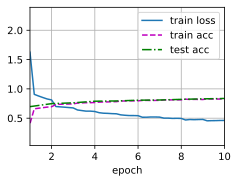

In [ ]:
import torch
from torch import nn

net28 = nn.Sequential(
    nn.Conv2d(1, 64, kernel_size=5, stride=2, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=1),

    nn.Conv2d(64, 128, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(128, 128, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(128, 96, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),

    nn.Linear(96 * 5 * 5, 2048), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(2048, 1024), nn.ReLU(),
    nn.Dropout(p=0.5),

    nn.Linear(1024, 10)
)

batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
lr, num_epochs = 0.01, 10
d2l.train_ch6(net28, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

3. 修改批量大小，并观察模型精度和GPU显存变化。
  - 批量大小越大，显存占用越多（非线性增长）
  - 小批量训练的泛化能力可能更强（会增加梯度估计的噪音，从而让模型在训练过程中更难陷入局部极小值或鞍点），但训练速度较慢
  - 大批量更加适合加速训练，但是容易导致泛化能力下降

4. 分析AlexNet的计算性能
  - 主要是哪部分占用显存
  - 哪部分需要更多的计算
  - 计算结果时显存带宽如何

回答：
- 显存的主要占用来自**全连接层的权重**和卷积层的**中间特征图**（全连接层的参数较多，卷积层的输出特征图在反向传播时需要暂存）
- 大部分计算需求来自**卷积层**，需要大量的矩阵乘法和加法运算
- 显存带宽需求较高，AlexNet中的卷积层可以较好的利用显存带宽，尤其是使用CUDA和cuDNN优化的实现，卷积计算可以并行高效地访问显存；全连接层计算密度低，可能会导致一些显存带宽的浪费
  - 显存带宽：处理数据时GPU从显存读取和写入数据的速度，会直接影响模型的整体计算效率


5. 将dropout和ReLU应用于LeNet-5，效果有提升吗？再试试预处理会怎么样？

loss 0.390, train acc 0.861, test acc 0.876
21522.5 examples/sec on cuda:0


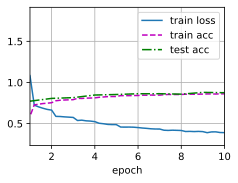

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

net_lenet = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5), nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(16 * 5 * 5, 120), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(120, 84), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(84, 10)
)

batch_size=128,
lr, num_epochs = 0.1, 10
d2l.train_ch6(net_lenet, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

#### 完整的训练过程，仔细看一边 11.2上午运行


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import time

# 定义模型（假设是一个简单的CNN模型）
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 定义数据加载和训练流程
def train_and_evaluate(batch_size):
    transform = transforms.Compose([transforms.ToTensor()])
    train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
    test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    model = SimpleCNN().cuda()  # 确保模型在GPU上
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters())

    # 训练模型
    for epoch in range(5):  # 训练5个epoch
        model.train()
        train_correct = 0
        for data, target in train_loader:
            data, target = data.cuda(), target.cuda() # 数据也要在GPU上
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_correct += (output.argmax(1) == target).sum().item() # 模型在训练集上的正确预测数量

        train_acc = train_correct / len(train_dataset)

        # 测试模型
        model.eval()
        test_correct = 0
        with torch.no_grad():
            for data, target in test_loader:
                data, target = data.cuda(), target.cuda()
                output = model(data)
                test_correct += (output.argmax(1) == target).sum().item() # 模型在测试集上的正确预测数量


        test_acc = test_correct / len(test_dataset)

        print(f'Batch Size: {batch_size}, Epoch: {epoch+1}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

# 监控 GPU 显存变化，并测试不同的批量大小
for batch_size in [16, 32, 64, 128, 256]:
    print(f'\nTesting with batch size: {batch_size}')
    train_and_evaluate(batch_size)


Testing with batch size: 16


100%|██████████| 26.4M/26.4M [00:00<00:00, 114MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 4.77MB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 58.7MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 8.16MB/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



RuntimeError: mat1 and mat2 shapes cannot be multiplied (16x50176 and 3136x128)